# Attack of the Dollar Generals: A Location Analysis of Dollar General Stores

***

#  Background

***

Dollar stores, also known as variety stores or general stores, have been around in the United States since the early 20th century. Generally speaking, they are retail stores which sell a wide variety of items for discounted or fixed price points. Historically these price points have been five cents, ten cents, or a dollar - leading to their generally accepted name being dollar stores. Today dollar stores are ubiquitous throughout the US and much of the world. If you are reading this right now its very likely you have been to a dollar store and that there is one in your hometown. There are three industry leading chains that dominate the dollar store landscape today - namely, Family Dollar, Dollar Tree, and the focus of this project Dollar General. Since its inception in 1955 Dollar General has grown at a breakneck speed. By 1968 Dollar General had roughly 300 stores and went public on the stock exchange, however, this success is nothing compared to what they have done in the past four decades. Today Dollar General stands at almost 18,000 stores spread across 46 states. In an era when retail has been dying a slow death - Dollar General has bucked the trend and not only avoided stagnation but rather has exploded. This begs the obvious question... how do they do it? Well, Dollar General has been accused of being predatory in its practices and bad for the poor. On the other hand it has been lauded as a company that will "go where Walmart won't" by bringing retail to rural America and providing much needed jobs. I aim to build a predictive model that can predict whether a town has a Dollar General or not based on income and demographic data. This can also answer/shed light into whether the accusations against Dollar General are true or if the areas that Dollar Generals really do stand to gain from stores being present.

# Overview

***

My motivation for this project is to investigate how Dollar General has choosen to open its stores throughout the country and to shed light ont the accusations that Dollar General is targetting rural and poor Americans in particular.

I have choosen Dollar General for a couple reasons:

It has over 18,000 stores and is prevalant in almost every state in the country.

It continues to grow amidst a retail climate that has seen many large players shrink their physical footprint - with plans for 1000 more stores in the next 4 years.

Their business has attracted the attention of media houses like CNN, WSJ, NYT, The Guardian, etc.

# Business Objective

***

From a business perspective this project has applications for a wide range of roles and industries. The findings apply to Dollar General itself, but also to its competitors who have failed to expand at the pace that Dollar General has. By setting out to categorize counties into those having Dollar Generals or not, this project is able to create a profile of what a Dollar General county looks like compared to a non Dollar General county. Based on the data the two different types of counties can be profiled by demographics, income, income per capita, occupation, occupational industry, gender, and many more features. This can also be insightful for private equity firms, consulting firms, and research firms interested in this space.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as SNS
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Data Imports

***

The data used in this project comes from two main sources. Firstly the Dollar General data comes from ScrapeHero a data scraping vendor. To download this data follow the hyperlink in the previous sentence. Secondly, the American Community Survey data was downloaded from a public Kaggle dataset that includes demographic, monetary, gender based, and occupational data on a county level.

In [3]:
DG = pd.read_csv(r'C:\Users\aalok\Downloads\Dollar_General_USA.csv.zip')

In [4]:
ACS = pd.read_csv(r'C:\Users\aalok\Downloads\acs2017_county_data.csv')

In [5]:
ACS1 = pd.read_csv(r'C:\Users\aalok\Downloads\acs2017_county_data_cleaned - acs2017_county_data.csv')

C:\Users\aalok\anaconda3\anaconda3.0\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Data Cleaning / EDA

***

## Dollar General Data Cleaning/EDA
***

In [6]:
DG.head()

,Store No.,Name,Latitude,Longitude,Address,Street,City,State,Zip_Code,County,Phone,URL,Provider,Banner,Updated Date,Country,Status,Direction URL,Stock Ticker
0,4405,Dollar General # 4405,30.193502,-93.218094,"3521 Ryan St, Lake Charles, LA, 70605",3521 Ryan St,Lake Charles,LA,70605,Calcasieu Parish,337-377-0289,https://www.dollargeneral.com/,Dollar General,Dollar General,2022-01-03,USA,Open,https://www.google.com/maps/dir/Current+Locati...,DG:NYSE
1,20909,Dollar General # 20909,31.526540,-92.407550,"7933 Ridge St, Pollock, LA, 71467",7933 Ridge St,Pollock,LA,71467,Grant Parish,318-545-4780,https://www.dollargeneral.com/,Dollar General,Dollar General,2022-01-03,USA,Open,https://www.google.com/maps/dir/Current+Locati...,DG:NYSE
2,11950,Dollar General # 11950,34.919377,-83.386249,"7 Page St, Clayton, GA, 30525",7 Page St,Clayton,GA,30525,Rabun,470-508-9149,https://www.dollargeneral.com/,Dollar General,Dollar General,2022-01-03,USA,Open,https://www.google.com/maps/dir/Current+Locati...,DG:NYSE
3,6115,Dollar General # 6115,33.496183,-82.137341,"210 S Belair Rd, Augusta, GA, 30907",210 S Belair Rd,Augusta,GA,30907,Columbia,706-619-1530,https://www.dollargeneral.com/,Dollar General,Dollar General,2022-01-03,USA,Open,https://www.google.com/maps/dir/Current+Locati...,DG:NYSE
4,10145,Dollar General # 10145,33.717249,-84.147343,"6633 Covington Hwy, Lithonia, GA, 30058",6633 Covington Hwy,Lithonia,GA,30058,DeKalb,470-508-8261,https://www.dollargeneral.com/,Dollar General,Dollar General,2022-01-03,USA,Open,https://www.google.com/maps/dir/Current+Locati...,DG:NYSE


In [7]:
DG.shape

(17989, 19)

In [8]:
DG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17989 entries, 0 to 17988
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store No.      17989 non-null  int64  
 1   Name           17989 non-null  object 
 2   Latitude       17989 non-null  float64
 3   Longitude      17989 non-null  float64
 4   Address        17989 non-null  object 
 5   Street         17989 non-null  object 
 6   City           17989 non-null  object 
 7   State          17989 non-null  object 
 8   Zip_Code       17989 non-null  int64  
 9   County         17989 non-null  object 
 10  Phone          17989 non-null  object 
 11  URL            17989 non-null  object 
 12  Provider       17989 non-null  object 
 13  Banner         17942 non-null  object 
 14  Updated Date   17989 non-null  object 
 15  Country        17989 non-null  object 
 16  Status         17989 non-null  object 
 17  Direction URL  17989 non-null  object 
 18  Stock 

The dataframe seems to have zero null values - thus it doesn't need much cleaning. However, from the dataframe head it seems that many of the columns may not be relevant or may all be one value. These columns can be eliminagted. Below I do some further EDA to explore this.

In [9]:
DG.Banner.isna().sum()

47

In [10]:
DG.Provider.isna().sum()

0

In [11]:
DG['Provider'].value_counts()

Dollar General    17989
Name: Provider, dtype: int64

In [12]:
DG['Status'].value_counts()

Open    17989
Name: Status, dtype: int64

In [13]:
DG['Stock Ticker'].value_counts()

DG:NYSE    17989
Name: Stock Ticker, dtype: int64

In [14]:
DG['URL'].value_counts()

https://www.dollargeneral.com/    17989
Name: URL, dtype: int64

In [15]:
DG['Updated Date'].value_counts()

2022-01-03    17989
Name: Updated Date, dtype: int64

In [16]:
DG['Country'].value_counts()

USA    17989
Name: Country, dtype: int64

Several columns stand out as possible eliminations that are probably not helpful for this project. Many of these non helpful columns simply have only 1 value for all stores (rows). These columns include... "Banner", "Provider", "Stock Ticker", "URL", "Updated Date" and "Status"

"Country" is another column with just one value for all rows, however, because this is part of the address we will keep it in the dataframe for now

In [17]:
DG.drop(['Banner',  "Provider", "Stock Ticker", "URL", "Updated Date", "Status"],  axis=1, inplace=True)

The six columns mentioned above have been dropped.

In [18]:
DG.shape

(17989, 13)

In [19]:
DG['State'].value_counts()

TX    1688
GA     993
FL     980
NC     951
OH     938
TN     879
AL     860
PA     860
KY     649
MI     638
IN     636
IL     632
LA     623
SC     606
MO     598
MS     581
NY     550
OK     501
AR     497
VA     455
IA     295
WV     268
KS     259
CA     242
WI     233
MN     191
NJ     174
MD     155
NE     137
AZ     129
NM     111
CT      76
OR      73
SD      70
CO      66
ME      63
ND      59
MA      55
DE      50
NH      43
VT      39
WA      24
NV      21
RI      21
UT      11
WY       9
Name: State, dtype: int64

A state by state visualization of stores per state could visually highlight where Dollar Generals seem to be more prevalant.

In [20]:
DG['Zip_Code'].value_counts()

38401    11
29526    11
29150    10
70726    10
30721    10
         ..
71259     1
61012     1
54867     1
44620     1
88061     1
Name: Zip_Code, Length: 11763, dtype: int64

<AxesSubplot:title={'center':' DG Store Count by State'}, xlabel='State', ylabel='Number of Stores'>

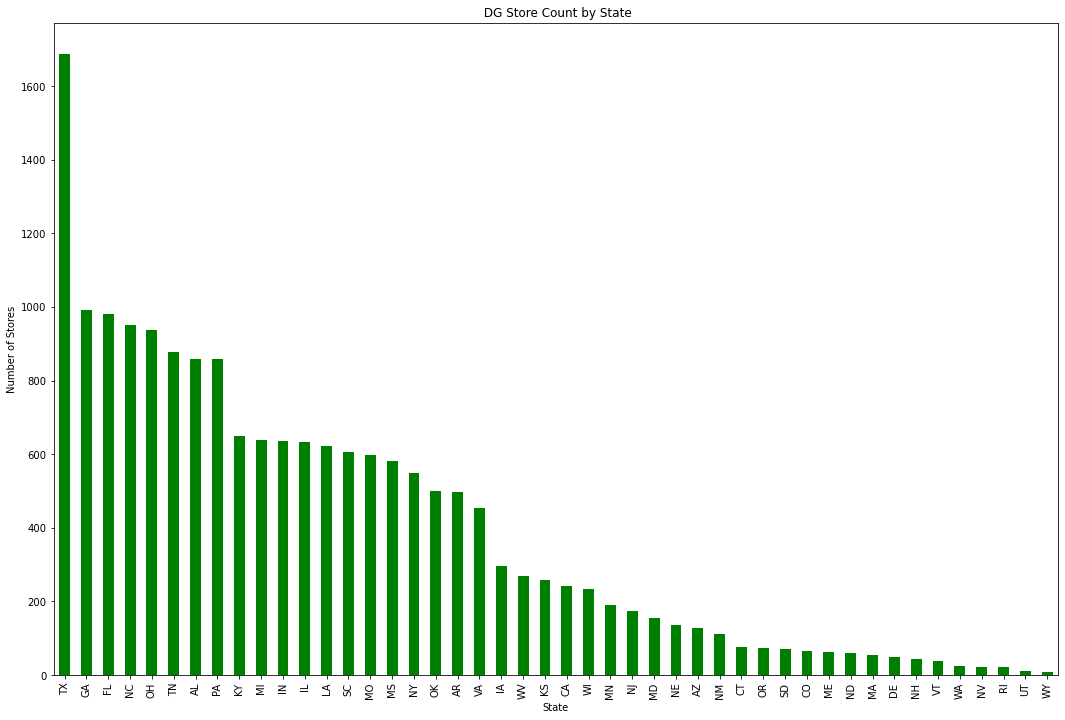

In [21]:
plt.figure(figsize=(18,12))
plt.xlabel("State")
plt.ylabel("Number of Stores")
plt.title(" DG Store Count by State")

DG['State'].value_counts().plot(kind='bar', color='green')

This bar chart above shows some interesting initial trends. Firstly, Texas is in a tier of its own when it comes to having Dollar General stores. Additionally, out of the top ten states with the most DG stores seven of them are in the South. Another trend that stands out is that DG is extremely prevelant in the South and the Midwest and comparatively has a small presence in either the Northeast or the West Coast. In fact, the Northeast or West Coast state with the most Dollar Generals, New York, is a paltry seventeenth on the list. This already suggests that Dollar General has specifically focused on the South and the Midwest in their expansion strategy.

Another way to quantify their supposed lopsided expansion strategy would be to plot DG stores per resident in the state. This would be done by applying state population to each store.

In [22]:
#Add a Stores in State column to give the total number of stores in the state
z = DG['State'].value_counts() 

z1 = z.to_dict() #converts to dictionary

DG['Stores in State'] = DG['State'].map(z1) 

In [23]:
#Create a Population in State Column 
DG['Population in State'] = DG['State'].map({'CA': 39613493, "TX" : 29730311, "FL" : 21944577, "NY" : 19299981, "PA" : 12804123, "IL" : 12569321, "OH" : 11714618, "GA" : 10830007, "NC": 10701022, "MI": 9992427,    
'NJ': 8874520, "VA" : 8603985, "WA" : 7796941, "AZ" : 7520103, "TN" : 6944260, "MA" : 6912239, "IN" : 6805663, "MO" : 6169038, "MD" : 6065436, "CO" : 5893634,    
'WI': 5852490, 'MN' : 5706398, 'SC': 5277830, 'AL': 4934193, 'LA' : 4627002, "KY": 4480713, 'OR': 4289439, 'OK':3990443, 'CT': 3552821, 'UT':3310774,    
'PR': 3194374, 'NV': 3185786, 'IA': 3167974, 'AR': 3033946, 'MS': 2966407, 'KS': 2917224, 'NM': 2105005, 'NE': 1951996, 'ID': 1860123, 'WV': 1767859,   
'HI': 1406430, 'NH': 1372203, 'ME': 1354522, 'MT': 1085004, 'RI': 1061509, 'DE': 990334, 'SD': 896581, 'ND': 770026, 'AK': 724357, 'DC': 714153, 'VT': 623251, 'WY': 581075})

The above population stats were sourced from worldpopulationreview.com (https://worldpopulationreview.com/states) - a website which tracks national and subnational populations worldwide. 

In [24]:
DG['Population in State'].value_counts().sum()

17989

All stores now have the amount of stores in their state and the population of their state - now we can calculate people per store or stores per people. For the people for store metric the lower the number the more stores they have to service the population. On the other hand, for the stores per person the higher the number the more stores they have to service the population. 

In [25]:
DG['Stores per Person'] = DG['Stores in State'] / DG['Population in State']
DG['People per Store'] = DG['Population in State'] / DG['Stores in State']

In [26]:
DG['People per Store'].value_counts()

17612.743483     1688
10906.351460      993
22392.425510      980
11252.389064      951
12488.931770      938
7900.182025       879
5737.433721       860
14888.515116      860
6904.026194       649
15662.111285      638
10700.727987      636
19888.166139      632
7426.969502       623
8709.290429       606
10316.117057      598
5105.691910       581
35090.874545      550
7964.956088       501
6104.519115       497
18909.857143      455
10738.894915      295
6596.488806       268
11263.413127      259
163692.119835     242
25117.982833      233
29876.429319      191
51002.988506      174
39131.845161      155
14248.145985      137
58295.372093      129
18964.009009      111
46747.644737       76
58759.438356       73
12808.300000       70
89297.484848       66
21500.349206       63
13051.288136       59
125677.072727      55
19806.680000       50
31911.697674       43
15980.794872       39
324872.541667      24
151704.095238      21
50548.047619       21
300979.454545      11
64563.8888

Here a second dataframe (DG2) was created for the purpose of the visualization below (inverse of stores per capita)

In [27]:
DG2 = DG.filter(['State', 'People per Store'], axis=1)
DG2.drop_duplicates(inplace=True)

In [28]:
#shape should be 46 x 2 as DG is only in 46 states and not in DC or PR
DG2.shape

(46, 2)

In [29]:
DG2.head(46)

,State,People per Store
0,LA,7426.969502
2,GA,10906.351460
7,IL,19888.166139
27,IN,10700.727987
41,MS,5105.691910
47,NC,11252.389064
71,MO,10316.117057
72,FL,22392.425510
76,KY,6904.026194
78,SD,12808.300000


In [30]:
DG2.sort_values(by=['People per Store'], inplace=True)

Text(0.5, 1.0, 'Population per Store by State')

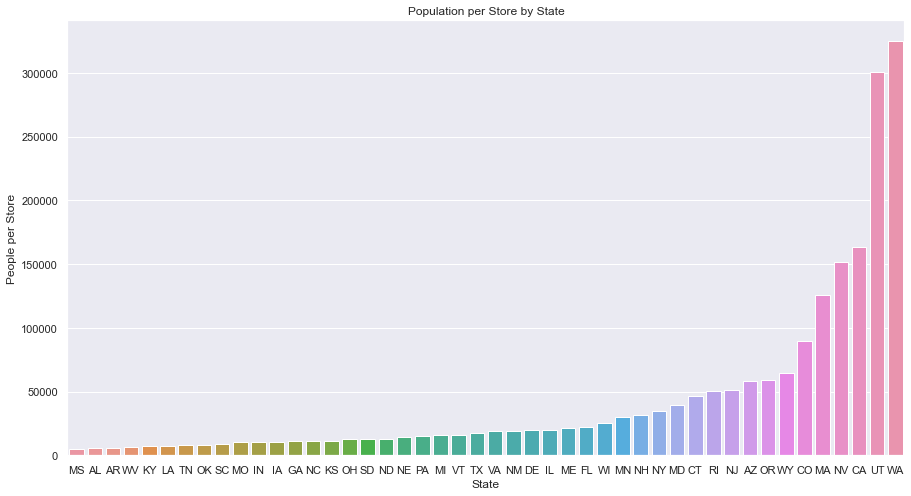

In [31]:
import seaborn as sns
sns.set_theme(style='whitegrid', palette="cubehelix")
sns.cubehelix_palette(start=.5, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='State', y='People per Store', data = DG2)
ax.set_title("Population per Store by State")

The above graph provides some very interesting insight. Firstly, it is important to note that the smaller the bar / lower the "People per Store" number the more stores Dollar General has per person in that state. So essentially Mississipi has the most Dollar General stores per capita and Washington has the least. Broadly speaking, it seems that some of the most rural and poorest states have the most Dollar General stores while some of the wealthiest ststes have the least Dollar General stores. The 5 states with the least amount of people per Dollar General store ( most stores per capita) are Mississippi, Alabama, Arkansas, West Virginia, and Kentucky. The 5 states with the most amount of people per Dollar General stores (least stores per capita) are Washington, Utah, California, Nevada, Massachusetts, and Colorado. 

Other than income, geographical location also stands out. The 5 states with most stores per capita are all in the South (West Virginia is borderline) while the 5 states with least stores per capita are all in the West or the Northeast. As mentioned before the Dollar General brand is most prevalant in the South and Midwest while the Northeast and West coast are still not saturated with Dollar General stores. 

## American Community Survey Data Cleaning/EDA
***

Now that we have taken a look at the state distribution of Dollar General stores and the stores per capita, we need to work with county level data.

In [32]:
ACS.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [33]:
ACS.shape

(3220, 37)

The number of rows in this dataframe makes sense - 3220 is roughly the amount of counties, parishes, and unincorporated census areas in the US (including DC and PR) as of 2017. 

In [34]:
ACS.columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [35]:
ACS[['Income', 'IncomeErr']]

,Income,IncomeErr
0,55317,2838
1,52562,1348
2,33368,2551
3,43404,3431
4,47412,2630
...,...,...
3215,18900,1219
3216,16261,2414
3217,19893,1935
3218,15586,1467


In [36]:
ACS[['IncomePerCap', 'IncomePerCapErr']]

,IncomePerCap,IncomePerCapErr
0,27824,2024
1,29364,735
2,17561,798
3,20911,1889
4,22021,850
...,...,...
3215,10197,576
3216,11136,1459
3217,10449,1619
3218,8672,702


In [37]:
ACS[['Poverty', 'ChildPoverty']]

,Poverty,ChildPoverty
0,13.7,20.1
1,11.8,16.1
2,27.2,44.9
3,15.2,26.6
4,15.6,25.4
...,...,...
3215,43.8,49.4
3216,36.8,68.2
3217,50.0,67.9
3218,52.4,62.1


Taking a look at the columns it looks like all of them are relevant in describing the socioeconomic status as well as demographic status of each county. It seems like all of the data in the column to the right of "County" are all numerical data. It also seems like many of them are percentages. The race/ethnicity columns- 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific' are all percentages that (theoretically) add up to 100%. This is the same situation for the employment type columns - 'Professional', 'Service', 'Office', 'Construction','Production'- the transportation type columns - 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp','WorkAtHome' - and the employment status columns - 'PrivateWork', 'PublicWork','SelfEmployed', 'FamilyWork', 'Unemployment'. The 'Employed','MeanCommute', 'Income', 'IncomeErr', 'TotalPop', 'Men', 'Women' columns are nominal variables. Finally the 'Poverty' and 'ChildPoverty' columns are percentages as well - however they do not total 100% together.

In [38]:
DG_AL = DG.loc[DG['State'] == 'AL']

In [39]:
DG_AL.head()

,Store No.,Name,Latitude,Longitude,Address,Street,City,State,Zip_Code,County,Phone,Country,Direction URL,Stores in State,Population in State,Stores per Person,People per Store
16147,6134,Dollar General # 6134,34.859700,-85.611924,"30357 Al Hwy 71, Bryant, AL, 35958",30357 Al Hwy 71,Bryant,AL,35958,Jackson,256-495-8522,USA,https://www.google.com/maps/dir/Current+Locati...,860,4934193,0.000174,5737.433721
16148,16427,Dollar General # 16427,34.465439,-87.058760,"6996 Danville Road, Hartselle, AL, 35640",6996 Danville Road,Hartselle,AL,35640,Morgan,256-502-5114,USA,https://www.google.com/maps/dir/Current+Locati...,860,4934193,0.000174,5737.433721
16149,1957,Dollar General # 1957,34.583772,-86.979603,"1502b 6th Ave Se, Decatur, AL, 35601",1502b 6th Ave Se,Decatur,AL,35601,Morgan,256-445-6845,USA,https://www.google.com/maps/dir/Current+Locati...,860,4934193,0.000174,5737.433721
16150,10017,Dollar General # 10017,34.590000,-87.030300,"2400 Old Moulton Rd Sw, Decatur, AL, 35603",2400 Old Moulton Rd Sw,Decatur,AL,35603,Morgan,256-580-6583,USA,https://www.google.com/maps/dir/Current+Locati...,860,4934193,0.000174,5737.433721
16151,21125,Dollar General # 21125,34.561700,-87.072000,"3621 Modaus Rd Sw, Decatur, AL, 35603",3621 Modaus Rd Sw,Decatur,AL,35603,Morgan,256-432-7030,USA,https://www.google.com/maps/dir/Current+Locati...,860,4934193,0.000174,5737.433721


In [40]:
ACS['County'] = ACS['County'].str.rstrip('County')

In [41]:
ACS.head(50)

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9
5,1011,Alabama,Bullock,10478,5616,4862,0.3,21.6,75.6,1.0,...,6.2,1.7,3.0,29.8,4290,81.4,13.6,5.0,0.0,12.1
6,1013,Alabama,Butler,20126,9416,10710,0.3,52.2,44.7,0.1,...,0.9,0.9,2.0,23.2,7727,79.1,15.3,5.3,0.3,7.6
7,1015,Alabama,Calhoun,115527,55593,59934,3.6,72.7,20.4,0.2,...,1.3,1.1,3.2,24.8,47392,74.9,19.9,5.1,0.1,10.1
8,1017,Alabama,Chambers,33895,16320,17575,2.2,56.2,39.3,0.3,...,0.6,0.5,2.0,23.6,14527,84.5,11.8,3.7,0.0,6.4
9,1019,Alabama,Cherokee,25855,12862,12993,1.6,91.8,5.0,0.5,...,0.3,0.3,2.0,26.5,9879,74.8,17.1,8.1,0.0,5.3


The word County has been removed from the County column to match the counties as they are listed in the DG dataframe. Louisiana since it has parishes has counties listed as "XYZ parish" - we need to confirm the ACS dataframe lists it similarly. 

In [42]:
ACS_LA = ACS.loc[ACS['State'] == 'Louisiana']
ACS_LA.head(50)

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1113,22001,Louisiana,Acadia Parish,62607,30433,32174,2.4,77.5,17.6,0.1,...,1.6,2.2,2.5,27.6,24982,80.0,12.1,7.6,0.3,8.9
1114,22003,Louisiana,Allen Parish,25667,14542,11125,4.9,71.1,19.0,1.8,...,0.7,2.2,2.3,28.3,8577,72.8,23.8,3.2,0.2,9.4
1115,22005,Louisiana,Ascension Parish,119129,58718,60411,5.3,69.4,21.8,0.0,...,0.5,1.0,3.6,30.0,57496,80.7,14.1,5.2,0.1,6.3
1116,22007,Louisiana,Assumption Parish,22881,11085,11796,2.8,65.8,29.7,0.6,...,1.0,1.8,1.5,29.6,9375,81.4,13.9,4.1,0.7,6.9
1117,22009,Louisiana,Avoyelles Parish,41095,20693,20402,1.8,65.3,30.1,1.2,...,2.0,2.0,1.6,30.2,14753,75.3,19.7,4.9,0.1,7.7
1118,22011,Louisiana,Beauregard Parish,36598,18631,17967,3.7,80.0,12.7,0.6,...,1.8,3.6,1.6,30.1,14174,76.5,18.2,5.2,0.1,7.4
1119,22013,Louisiana,Bienville Parish,13806,6692,7114,1.7,54.3,41.5,0.1,...,1.6,0.8,2.8,32.6,5020,68.9,23.4,6.8,0.9,7.4
1120,22015,Louisiana,Bossier Parish,125698,62214,63484,6.5,67.6,21.6,0.5,...,1.4,1.4,3.0,21.7,54751,76.0,18.8,5.0,0.1,5.8
1121,22017,Louisiana,Caddo Parish,251069,119235,131834,2.8,45.6,48.3,0.4,...,1.2,1.0,2.4,20.9,105583,81.2,14.1,4.6,0.1,7.0
1122,22019,Louisiana,Calcasieu Parish,198753,96906,101847,3.2,68.2,24.6,0.3,...,1.5,1.8,2.1,20.5,90318,80.9,14.0,5.0,0.1,6.6


We do not need to remove the "Parish" part of the county names for Louisiana.

**Cleaning the ACS Dataframe**

We want to combine the two dataframes we have now, however, I will be doing so by adding our target variable to the ACS data frame. Target variable will be named "DG in County" and will either be a 1 (Yes) or 0 (No).

We also want to drop the columns that are uneccesary within the ACS dataframe so we can begin modeling. 

In [43]:
ACS1.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,DG in County,State.1,County.1,Search Key Orig,Search Key DG in County
0,1001.0,Alabama,Autauga,55036.0,26899.0,28137.0,2.7,75.4,18.9,0.3,...,74.1,20.2,5.6,0.1,5.2,1.0,Louisiana,Calcasieu Parish,Autauga Alabama,Calcasieu Parish Louisiana
1,1003.0,Alabama,Baldwin,203360.0,99527.0,103833.0,4.4,83.1,9.5,0.8,...,80.7,12.9,6.3,0.1,5.5,1.0,Louisiana,Grant Parish,Baldwin Alabama,Grant Parish Louisiana
2,1005.0,Alabama,Barbour,26201.0,13976.0,12225.0,4.2,45.7,47.8,0.2,...,74.1,19.1,6.5,0.3,12.4,1.0,Georgia,Rabun,Barbour Alabama,Rabun Georgia
3,1007.0,Alabama,Bibb,22580.0,12251.0,10329.0,2.4,74.6,22.0,0.4,...,76.0,17.4,6.3,0.3,8.2,1.0,Georgia,Columbia,Bibb Alabama,Columbia Georgia
4,1009.0,Alabama,Blount,57667.0,28490.0,29177.0,9.0,87.4,1.5,0.3,...,83.9,11.9,4.0,0.1,4.9,1.0,Georgia,DeKalb,Blount Alabama,DeKalb Georgia


In [44]:
ACS1.drop(['State.1',  "County.1", "Search Key Orig", "Search Key DG in County", "CountyId"],  axis=1, inplace=True)

In [45]:
ACS1['DG in County'].value_counts()

1.0    2517
0.0     703
Name: DG in County, dtype: int64

In [46]:
ACS1['County'] = ACS1['County'].str.replace('County', '')
ACS1['County'] = ACS1['County'].str.rstrip()

In [47]:
ACS1.head(50)

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,DG in County
0,Alabama,Autauga,55036.0,26899.0,28137.0,2.7,75.4,18.9,0.3,0.9,...,1.3,2.5,25.8,24112.0,74.1,20.2,5.6,0.1,5.2,1.0
1,Alabama,Baldwin,203360.0,99527.0,103833.0,4.4,83.1,9.5,0.8,0.7,...,1.1,5.6,27.0,89527.0,80.7,12.9,6.3,0.1,5.5,1.0
2,Alabama,Barbour,26201.0,13976.0,12225.0,4.2,45.7,47.8,0.2,0.6,...,1.7,1.3,23.4,8878.0,74.1,19.1,6.5,0.3,12.4,1.0
3,Alabama,Bibb,22580.0,12251.0,10329.0,2.4,74.6,22.0,0.4,0.0,...,1.7,1.5,30.0,8171.0,76.0,17.4,6.3,0.3,8.2,1.0
4,Alabama,Blount,57667.0,28490.0,29177.0,9.0,87.4,1.5,0.3,0.1,...,0.4,2.1,35.0,21380.0,83.9,11.9,4.0,0.1,4.9,1.0
5,Alabama,Bullock,10478.0,5616.0,4862.0,0.3,21.6,75.6,1.0,0.7,...,1.7,3.0,29.8,4290.0,81.4,13.6,5.0,0.0,12.1,1.0
6,Alabama,Butler,20126.0,9416.0,10710.0,0.3,52.2,44.7,0.1,1.1,...,0.9,2.0,23.2,7727.0,79.1,15.3,5.3,0.3,7.6,1.0
7,Alabama,Calhoun,115527.0,55593.0,59934.0,3.6,72.7,20.4,0.2,1.0,...,1.1,3.2,24.8,47392.0,74.9,19.9,5.1,0.1,10.1,1.0
8,Alabama,Chambers,33895.0,16320.0,17575.0,2.2,56.2,39.3,0.3,1.0,...,0.5,2.0,23.6,14527.0,84.5,11.8,3.7,0.0,6.4,1.0
9,Alabama,Cherokee,25855.0,12862.0,12993.0,1.6,91.8,5.0,0.5,0.1,...,0.3,2.0,26.5,9879.0,74.8,17.1,8.1,0.0,5.3,1.0


Firstly - Dollar General is currently not operating in Montana, Idaho, Alaska, Hawaii, Washington DC or Puerto Rico. Thus, we can set our "Dollar General in County" column to 0 for any county within these states/jurisdictions.

In [48]:
for i in ACS1['State']:
        ACS1.loc[ACS1.State == 'Montana', "DG in County"] = 0
        ACS1.loc[ACS1.State == 'Idaho', "DG in County"] = 0
        ACS1.loc[ACS1.State == 'Alaska', "DG in County"] = 0
        ACS1.loc[ACS1.State == 'Hawaii', "DG in County"] = 0
        ACS1.loc[ACS1.State == 'Puerto Rico', "DG in County"] = 0
        ACS1.loc[ACS1.State == 'District of Columbia', "DG in County"] = 0

In [49]:
ACS1['DG in County'].value_counts()

1.0    2517
0.0     703
Name: DG in County, dtype: int64

In [50]:
ACS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17989 entries, 0 to 17988
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             3220 non-null   object 
 1   County            3220 non-null   object 
 2   TotalPop          3220 non-null   float64
 3   Men               3220 non-null   float64
 4   Women             3220 non-null   float64
 5   Hispanic          3220 non-null   float64
 6   White             3220 non-null   float64
 7   Black             3220 non-null   float64
 8   Native            3220 non-null   float64
 9   Asian             3220 non-null   float64
 10  Pacific           3220 non-null   float64
 11  VotingAgeCitizen  3220 non-null   float64
 12  Income            3220 non-null   float64
 13  IncomeErr         3220 non-null   float64
 14  IncomePerCap      3220 non-null   float64
 15  IncomePerCapErr   3220 non-null   float64
 16  Poverty           3220 non-null   float6

In [51]:
ACS1.dropna(inplace=True)
ACS1.shape

(3219, 37)

# Splitting into X and y, Standardization, and Train/Test Split
***

In [52]:
X = ACS1.loc[:, ACS1.columns != 'DG in County']
X = X.loc[:, X.columns != 'State']
X = X.loc[:, X.columns != 'County']
y = ACS1['DG in County']
X.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,55036.0,26899.0,28137.0,2.7,75.4,18.9,0.3,0.9,0.0,41016.0,...,0.6,1.3,2.5,25.8,24112.0,74.1,20.2,5.6,0.1,5.2
1,203360.0,99527.0,103833.0,4.4,83.1,9.5,0.8,0.7,0.0,155376.0,...,0.8,1.1,5.6,27.0,89527.0,80.7,12.9,6.3,0.1,5.5
2,26201.0,13976.0,12225.0,4.2,45.7,47.8,0.2,0.6,0.0,20269.0,...,2.2,1.7,1.3,23.4,8878.0,74.1,19.1,6.5,0.3,12.4
3,22580.0,12251.0,10329.0,2.4,74.6,22.0,0.4,0.0,0.0,17662.0,...,0.3,1.7,1.5,30.0,8171.0,76.0,17.4,6.3,0.3,8.2
4,57667.0,28490.0,29177.0,9.0,87.4,1.5,0.3,0.1,0.0,42513.0,...,0.4,0.4,2.1,35.0,21380.0,83.9,11.9,4.0,0.1,4.9


Below we standardize every column ...

In [53]:
for col in X.columns:
    #Subtract the minimum and divide by the range forcing a scale of 0 to 1 for each feature
    X[col] = (X[col] - min(X[col]))/ (max(X[col]) - min(X[col])) 

X.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0.005439,0.005394,0.005482,0.027,0.754,0.217491,0.003322,0.021531,0.0,0.006587,...,0.010135,0.030093,0.075758,0.5175,0.005009,0.745234,0.261589,0.147368,0.0125,0.127139
1,0.020116,0.019979,0.020249,0.044,0.831,0.109321,0.008859,0.016746,0.0,0.024978,...,0.013514,0.025463,0.169697,0.5475,0.018621,0.859619,0.140728,0.165789,0.0125,0.134474
2,0.002585,0.002799,0.002378,0.042,0.457,0.550058,0.002215,0.014354,0.0,0.003250,...,0.037162,0.039352,0.039394,0.4575,0.001839,0.745234,0.243377,0.171053,0.0375,0.303178
3,0.002227,0.002452,0.002008,0.024,0.746,0.253165,0.004430,0.000000,0.0,0.002831,...,0.005068,0.039352,0.045455,0.6225,0.001692,0.778163,0.215232,0.165789,0.0375,0.200489
4,0.005699,0.005714,0.005685,0.090,0.874,0.017261,0.003322,0.002392,0.0,0.006827,...,0.006757,0.009259,0.063636,0.7475,0.004441,0.915078,0.124172,0.105263,0.0125,0.119804


Below we do perform the train test split... 

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=420)

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2414 entries, 465 to 2994
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TotalPop          2414 non-null   float64
 1   Men               2414 non-null   float64
 2   Women             2414 non-null   float64
 3   Hispanic          2414 non-null   float64
 4   White             2414 non-null   float64
 5   Black             2414 non-null   float64
 6   Native            2414 non-null   float64
 7   Asian             2414 non-null   float64
 8   Pacific           2414 non-null   float64
 9   VotingAgeCitizen  2414 non-null   float64
 10  Income            2414 non-null   float64
 11  IncomeErr         2414 non-null   float64
 12  IncomePerCap      2414 non-null   float64
 13  IncomePerCapErr   2414 non-null   float64
 14  Poverty           2414 non-null   float64
 15  ChildPoverty      2414 non-null   float64
 16  Professional      2414 non-null   float6

In [56]:
X_train.shape

(2414, 34)

In [57]:
y_train.value_counts()

1.0    1910
0.0     504
Name: DG in County, dtype: int64

# Models
***

## Logistic Regression Model

In [58]:
def logreg(X_train, X_test, y_train, y_test, cv=5):
    
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'penalty': ['l1', 'l2' ,'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
    
    # Instantiate & fit LogReg model for GridSearch
    grid_logreg = LogisticRegression(random_state=42)
    grid_logreg.fit(X_train, y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_logreg, param_grid=grid, cv=cv,
                      scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    logreg_params = gs.best_params_
    
    # Use best penalty from best_params
    logreg_penalty = logreg_params['penalty']
    print(f'Penalty: {logreg_penalty}')
    
    # Use best solver from best_params
    logreg_solver = logreg_params['solver']
    print(f'Solver: {logreg_solver}')
    
    # Instantiate & fit LogReg model
    log = LogisticRegression(random_state=420, penalty=logreg_penalty, solver=logreg_solver)
    log.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = log.predict(X_test)
    y_pred_proba = log.predict_proba(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(log, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = log.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = log.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
  
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 Score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(log, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(log, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(log, X_train, y_train)
    plot_confusion_matrix(log, X_test, y_test)
    return y_pred,y_pred_proba

Penalty: l1
Solver: liblinear
Mean Cross-Val Score: 0.8396854032971659
Train Mean Accuracy: 0.8405136702568351
Test Mean Accuracy: 0.8111801242236025
Recall Score: 0.9686985172981878
Precision Score: 0.8155339805825242
F1 Score: 0.8855421686746988


(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 

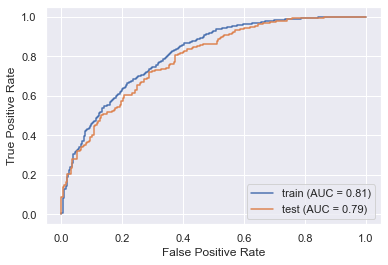

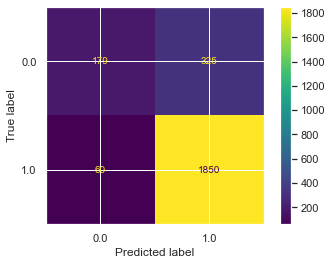

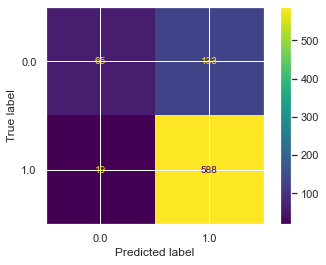

In [61]:
logreg(X_train, X_test, y_train, y_test, cv=5)

## Decision Tree Model

In [62]:
def dtree(X_train, X_test, y_train, y_test, cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'max_depth': [3,10,15],
    'min_samples_split': [2,8,10,15],
    'criterion': ['gini', 'entropy']}
    
    # Instantiate & fit Decision Tree model for GridSearch
    grid_dt = DecisionTreeClassifier()
    grid_dt.fit(X_train, y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_dt, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    dt_params = gs.best_params_
    
    # Use best max depth from best_params
    dt_max_depth = dt_params['max_depth']
    print(f'Max Depth: {dt_max_depth}')
    
    # Use best minimum sample split from best_params
    dt_min_samp = dt_params['min_samples_split']
    print(f'Min Sample Split: {dt_min_samp}')
    
    # Use best criterion from best_params
    dt_criterion = dt_params['criterion']
    print(f'criterion: {dt_criterion}')
    
    # Instantiate & fit Decision Tree model
    dtree = DecisionTreeClassifier(max_depth=dt_max_depth, criterion=dt_criterion,
                                   min_samples_split=dt_min_samp, random_state=420)
    dtree.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = dtree.predict(X_test)
    y_prob= dtree.predict_proba(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(dtree, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = dtree.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = dtree.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(dtree, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(dtree, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(dtree, X_train, y_train)
    plot_confusion_matrix(dtree, X_test, y_test)
    
    return y_pred,y_prob

Max Depth: 3
Min Sample Split: 2
criterion: gini
Mean Cross-Val Score: 0.8322276917261583
Train Mean Accuracy: 0.8504556752278376
Test Mean Accuracy: 0.8124223602484472
Recall Score: 0.9835255354200988
Precision Score: 0.8089430894308943
F1 score: 0.887732342007435


(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 

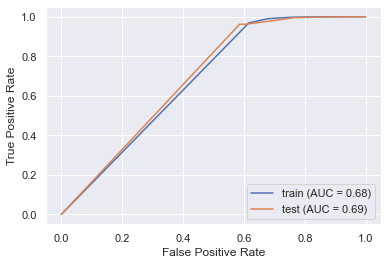

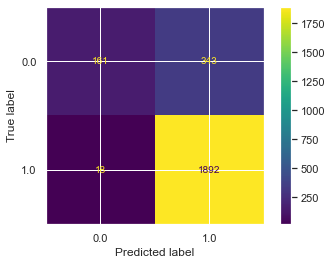

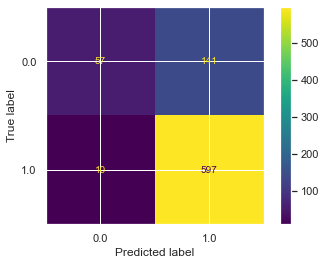

In [63]:
dtree(X_train, X_test, y_train, y_test, cv=5)

## Random Forest Model

In [64]:
def random_forest(X_train, X_test, y_train, y_test, cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'n_estimators': [75,90,100,110,115,125,150,500],
    'criterion': ['gini', 'entropy']}
    
    # Instantiate & fit Random Forest model for GridSearch
    grid_rf = RandomForestClassifier()
    grid_rf.fit(X_train,y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_rf, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    rf_params = gs.best_params_
    
    # Use best # of trees from best_params
    rf_n_estimators = rf_params['n_estimators']
    print(f'Number of Trees: {rf_n_estimators}')
    
    # Use best criterion from best_params
    rf_criterion = rf_params['criterion']
    print(f'criterion: {rf_criterion}')
    
    # Instantiate & fit Random Forest model
    rforest = RandomForestClassifier(n_estimators=rf_n_estimators, criterion=rf_criterion,
                                    random_state=42)
    rforest.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = rforest.predict(X_test)
    y_prob = rforest.predict_proba(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(rforest, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = rforest.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = rforest.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(rforest, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(rforest, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(rforest, X_train, y_train)
    plot_confusion_matrix(rforest, X_test, y_test);
    
    return y_pred,y_prob


Number of Trees: 110
criterion: entropy
Mean Cross-Val Score: 0.857081862151319
Train Mean Accuracy: 1.0
Test Mean Accuracy: 0.8409937888198757
Recall Score: 0.9752883031301482
Precision Score: 0.8397163120567376
F1 score: 0.9024390243902438


(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
        0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 

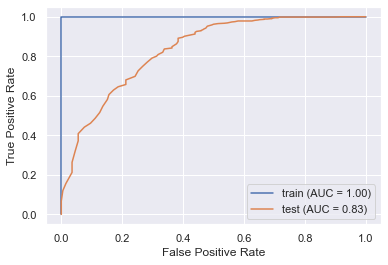

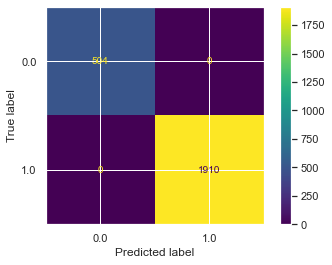

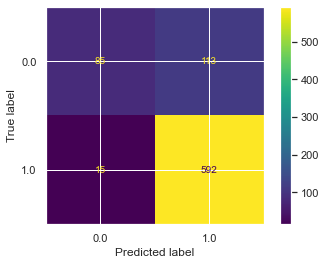

In [65]:
random_forest(X_train, X_test, y_train, y_test, cv=5)

All three models performed relatively similarly, however, the Random Forest model was the best one. Below are the AUC curves for all three of the models. The most important and insightful metric for an analysis like this is the precision score. The precision score is the ratio of correctly predicted positive observations to the total predicted positive observations. The precision score is insightful because it allows us to see the false positves aka the counties that do NOT have a Dollar General but which our model has incorrectly classified as having a Dollar General. These counties are ripe for expansion and, according to our model, they fit the profile of a Dollar General county. For our three models, Decision Tree, Log Regression, and Random Forest the precision scores are 80.9%, 81.5%, 84.0% respectively. Therefore Random Forest is the best model for this project.

# Final Model & Model Evaluation
***

The Final Model that works the best would be - the Random Forest model with 110 trees that uses entropy as its criterion for splitting. The Random Forest model is the better than the Logistic Regression and Decision Tree categorization models because of its superior precision score. While the metrics of all three models are relatively similar the precision score is the paramount metric in an analysis like this. The metric that matters the most in an analysis like this is precision score - aka how many of the counties predicted to have Dollar General's actually do. Using this we can take a look at our false positive counties which could be counties that are ripe for expansion of Dollar General into. These false positives are counties that the model falsely categorized as having dollar generals and so they meet certain criteria that fit the profile of Dollar General Counties.

# DG County vs Non-DG County Profile
***

I created two new dataframes. ACSDG is all the counties that have a Dollar General in county. ACSNDG is all the counties that do not have Dollar General in county.

In [66]:
ACSDG = ACS1.loc[ACS1['DG in County'] == 1]

ACSNDG = ACS1.loc[ACS1['DG in County'] == 0]

To see what differentiates a DG county vs a Non-DG county it is neccesary to take a look at the features within each of the counties and then compare means and medians of the features. 

### Total Population

In [67]:
ACSDG.TotalPop.mean()

99747.62614223281

In [68]:
ACSNDG.TotalPop.mean()

104570.52564102564

In [69]:
ACSDG.TotalPop.median()

28364.0

In [70]:
ACSNDG.TotalPop.median()

18414.5

Looking at Total Population certain things stand out. Firstly there is a huge difference between the mean and median populations - suggesting some huge outliers (most likely representing large cities and urban counties). The results here show a very interesting phenomenon.

The median population of a non Dollar General county is much smaller than the median population of a dollar general county. Meanwhile comparing means the non Dollar General county is larger. This means that Dollar General is avoiding two types of counties - 1) very largely populated urban counties and 2) counties that are extremely rural and have less than 20,000 people. 

### Demographics

In [71]:
ACSDG.White.mean()

77.78148589590782

In [72]:
ACSNDG.White.mean()

64.73803418803419

In [73]:
ACSDG.White.median()

84.9

In [74]:
ACSNDG.White.median()

75.6

Looking at the White population as a percentage of total population in the country it becomes obvious that Dollar General counties tend to be much more White than non-Dollar General counties. This supports the thesis that rural populations are being targetted by Dollar General as rural America tends to be much more White than urban or even suburban America. 

### Unemployment, Poverty, and Income

In [75]:
ACSDG.Unemployment.mean()

6.464123957091776

In [76]:
ACSNDG.Unemployment.mean()

7.397435897435898

In [77]:
ACSDG.Unemployment.median()

6.2

In [78]:
ACSNDG.Unemployment.median()

5.95

In [79]:
ACSDG.Poverty.mean()

16.225148986889153

In [80]:
ACSNDG.Poverty.mean()

18.77877492877493

In [81]:
ACSDG.Poverty.median()

15.5

In [82]:
ACSNDG.Poverty.median()

14.75

In [83]:
ACSDG.Income.mean()

48799.434247119585

In [84]:
ACSNDG.Income.mean()

49677.87321937322

In [85]:
ACSDG.Income.median()

47371.0

In [86]:
ACSNDG.Income.median()

48986.5

When taking a look at unemployment we can see a mixed bag. There does not seem to be a distinct trend or relationship present between having a Dollar General in county and having higher or lower unemployment. Poverty is also similarly distributed where there doesnt seem to be any distinct relationship. Finally when it comes to income - with both mean and median we can see that counties that do not have Dollar General tend to have higher incomes.This also supports the thesis that poorer Americans are being targeted by the Dollar General chain.

### Other Features

In [87]:
ACSDG.Transit.mean() , ACSNDG.Transit.mean()

(0.7831545490663488, 1.4990028490028489)

In [88]:
ACSDG.Transit.median() , ACSNDG.Transit.median()

(0.3, 0.5)

In [89]:
ACSDG.Drive.mean() , ACSNDG.Drive.mean()

(80.88216130313866, 75.21153846153847)

In [90]:
ACSDG.Drive.median() , ACSNDG.Drive.median()

(81.6, 77.7)

In [91]:
ACSDG.IncomePerCap.mean(), ACSNDG.IncomePerCap.mean()

(25521.35001986492, 26114.508547008547)

In [92]:
ACSDG.IncomePerCap.median(), ACSNDG.IncomePerCap.median()

(24965.0, 26126.5)

In [93]:
ACSDG.ChildPoverty.mean() , ACSNDG.ChildPoverty.mean()

(22.6450933651172, 24.458831908831907)

In [94]:
ACSDG.ChildPoverty.median() , ACSNDG.ChildPoverty.median()

(21.8, 19.95)

Taking a look at the other features of interest and comparing between DG and non-DG counties sheds some clear insights into the differences between the counties. In regards to public transit, using both median and mean, a person living in a Dollar General county is less likely to use public transit. On the other hand a person living in a Dollar General county is also far more likely to drive than someone living in a non-Dollar general county. Public transit networks have historically been present in high density urban locations, and so this once again supports the rural aspect of the targetting thesis. 

# Conclusion

In conclusion, the idea that Dollar General is specifically choosing to expand in more rural, low income communities is not without merit. However, this project does not provide consclusive proof either way that Dollar General's expansion strategy is targetting these communities.

In regards to the profile of a Dollar General county we can see that it tends to be more White, less populated, more driving centric, and less wealthy. While this is not conclusive enough to say that Dollar General is targetting white, rural, low income populations it definitely lends credence to this idea. Further work will be neccesary to prove this conclusively.

# Future Work 

In the future I think there are three main extensions that can be pursued...

1. Use Time Series data to model Dollar General's expansion over time
2. Use Zip Code level data instead of county data as a zip code is a more minute unit of measurement
3. Deploy a Streamlit web app to display data and visualizations